In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
from xgboost import XGBRegressor

### Problem statement -  Quality Rating prediction

In [ ]:
#The manufacturing dataset consists of the following columns:

#1.	Temperature (°C): This column represents the temperature during the manufacturing process, 
#measured in degrees Celsius. Temperature plays a critical role in many manufacturing processes, 
#influencing material properties and product quality.

#2.	Pressure (kPa): The pressure applied during the manufacturing process, measured in kilopascals (kPa). 
#Pressure can affect the material transformation and the overall outcome of the manufacturing process.

#3.	Temperature x Pressure: This feature is an interaction term between temperature and pressure,
#which captures the combined effect of these two process parameters.

#4.	Material Fusion Metric: A derived metric calculated as the sum of the square of temperature and the cube of pressure.
#It represents a material fusion-related measurement during the manufacturing process.

#5.	Material Transformation Metric: Another derived metric calculated as the cube of temperature minus the square of pressure.
#It provides insight into material transformation dynamics.

#6.	Quality Rating: The target variable, 'Quality Rating,' represents the overall quality rating of the produced items. 
#Quality is a crucial aspect of manufacturing, and this rating serves as a measure of the final product's quality.


## Step 1 : Data Gathering

In [2]:
df = pd.read_csv('manufacturing.csv')
df.head(10)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
5,229.178823,8.498306,1947.631786,53136.690654,1.203707e+07,99.998786
6,187.517442,19.412851,3640.248155,42478.694500,6.593260e+06,100.000000
7,278.354600,7.070944,1968.229758,77834.818230,2.156722e+07,95.732723
8,292.732552,20.432896,5981.373734,94223.147069,2.508452e+07,64.623599
9,176.688304,14.145782,2499.394266,34049.372335,5.515789e+06,100.000000


##  Step 2:EDA - Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [4]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


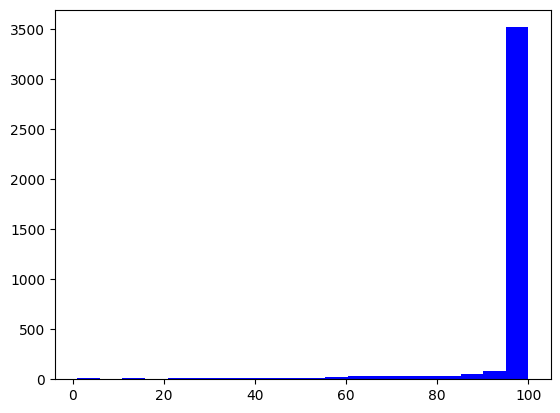

In [29]:
plt.hist(df['Quality Rating'], bins= 20, color ='blue')
plt.show()

In [5]:
df.isna().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

#### Checking data for Outliers

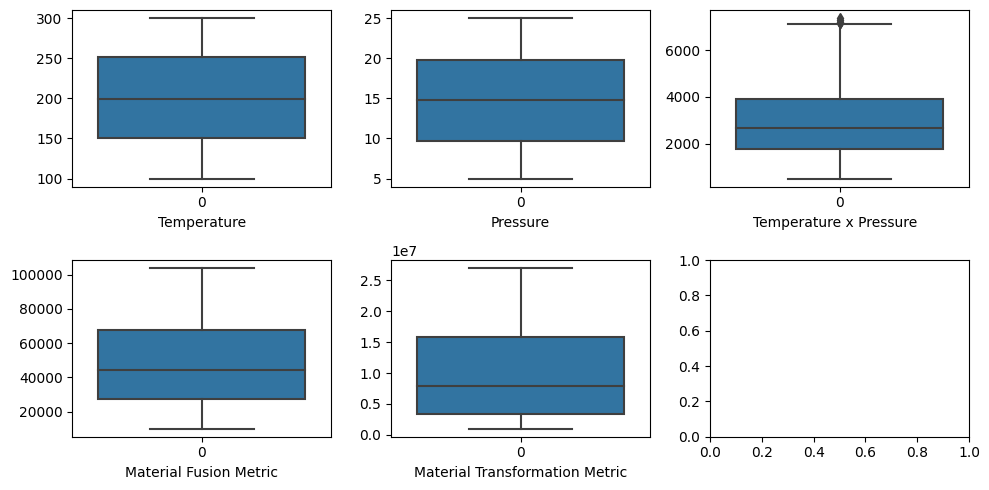

In [6]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['Temperature (°C)'], ax = axs[0,0]).set(xlabel= 'Temperature')
plt2 = sns.boxplot(df['Pressure (kPa)'], ax = axs[0,1]).set(xlabel='Pressure')
plt3 = sns.boxplot(df['Temperature x Pressure'], ax = axs[0,2]).set(xlabel='Temperature x Pressure  ')
plt1 = sns.boxplot(df['Material Fusion Metric'], ax = axs[1,0]).set(xlabel='Material Fusion Metric')
plt2 = sns.boxplot(df['Material Transformation Metric'], ax = axs[1,1]).set(xlabel='Material Transformation Metric')

plt.tight_layout()

<AxesSubplot: >

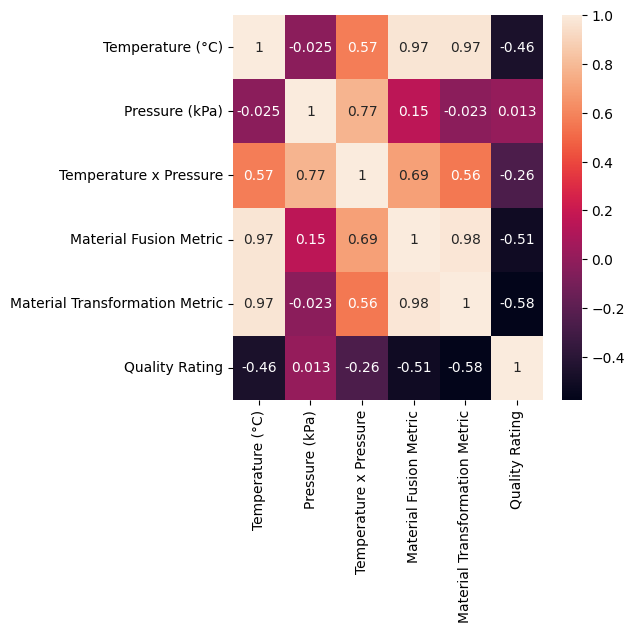

In [7]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

## Step 3: Train test split 

In [8]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [9]:
numerical_features = ['Temperature (°C)','Pressure (kPa)','Temperature x Pressure','Material Fusion Metric','Material Transformation Metric']

In [10]:
def train_test_split_data(df):
    y = df["Quality Rating"]
    x = df.drop('Quality Rating',axis=1)
    features = list(x.columns)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    return x_train, x_test, y_train, y_test,features

In [11]:
x_train, x_test, y_train, y_test,features = train_test_split_data(df)

In [12]:
x_train.head(10)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
3713,195.047668,10.725532,2091.990056,39277.426200,7.420199e+06
713,191.281913,20.549397,3930.727882,45266.322135,6.998348e+06
3819,178.227142,24.033257,4283.378732,45646.462194,5.660792e+06
3584,150.036001,15.002019,2250.842973,25887.164865,3.377206e+06
2294,197.686618,14.180148,2803.225454,41931.294556,7.725392e+06
1084,272.224602,15.941536,4339.678299,78157.497273,2.017329e+07
1388,120.221498,20.745969,2494.111417,23382.174098,1.737156e+06
361,280.796791,11.067122,3107.612368,80202.352126,2.213982e+07
3687,225.307042,7.383163,1663.478696,51165.727589,1.143727e+07
1368,258.656335,13.168546,3406.127843,69186.664922,1.730474e+07


##  Step 4: Train and evaluate the model

In [13]:
param_grid = [{'learning_rate': [0.1, 0.2, 0.3],
               'max_depth': [3,4,5],
               'subsample': [0.8, 0.9],
               'colsample_bytree': [0.8, 0.9],
               'n_estimators' : [50]}
             ]

In [14]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor(random_state=0)
search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, verbose=5, scoring = 'r2')
search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.999 total time=   0.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.999 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 3/5] END colsampl

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=50, subsample=0.9;, score=1.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=50, subsample=0.9;, score=1.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=50, subsample=0.9;, score=1.000 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=50, subsample=0.9;, score=1.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, n_estimators=50,

[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.0s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.0s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9;, score=1.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9;, score=1.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=0, ...),
             param_grid=[{'colsample_bytree': [0.8, 0.9],
                          'learning_rate': [0.1, 0.2, 0.3],
                          'max_depth': [3, 4, 5], 'n_estimators': [50],
                          'subsample': [0.8, 0.9]}],
             scoring='r2', verbose=5)

In [15]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,0.052645,0.007190,0.000613,0.000807,0.9,0.2,5,50,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999808,0.999836,0.999799,0.999799,0.999889,0.999826,0.000034,1
10,0.049241,0.008465,0.000600,0.001200,0.8,0.2,5,50,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999808,0.999836,0.999799,0.999799,0.999889,0.999826,0.000034,1
11,0.048014,0.006432,0.000139,0.000277,0.8,0.2,5,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999813,0.999780,0.999695,0.999858,0.999902,0.999810,0.000071,3
29,0.052091,0.005543,0.003834,0.005298,0.9,0.2,5,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999813,0.999780,0.999695,0.999858,0.999902,0.999810,0.000071,3
26,0.047549,0.005129,0.000400,0.000800,0.9,0.2,4,50,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999805,0.999804,0.999779,0.999769,0.999851,0.999801,0.000028,5
8,0.042150,0.007392,0.000205,0.000410,0.8,0.2,4,50,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999805,0.999804,0.999779,0.999769,0.999851,0.999801,0.000028,5
27,0.050835,0.003036,0.000719,0.001163,0.9,0.2,4,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999791,0.999773,0.999718,0.999808,0.999865,0.999791,0.000048,7
9,0.044727,0.009662,0.000800,0.000979,0.8,0.2,4,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999791,0.999773,0.999718,0.999808,0.999865,0.999791,0.000048,7
35,0.055802,0.006164,0.003593,0.006238,0.9,0.3,5,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.3...",0.999804,0.999745,0.999596,0.999754,0.999910,0.999762,0.000102,9
17,0.056993,0.008381,0.000376,0.000752,0.8,0.3,5,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.3...",0.999804,0.999745,0.999596,0.999754,0.999910,0.999762,0.000102,9


In [16]:
search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 50,
 'subsample': 0.8}

In [17]:
model = XGBRegressor(colsample_bytree= 0.8, learning_rate = 0.2, max_depth = 5, n_estimators = 50, subsample = 0.8)
model.fit(x_train, y_train)
xgb_predict = model.predict(x_test)

In [18]:
r2_score(y_test, xgb_predict)

0.9997720328536376

In [19]:
mean_absolute_percentage_error(y_test, xgb_predict)

0.0013573967382477516

# Step 5: Get important features

In [20]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)
importances.head(10)

,importance,feature
1,0.000047,Pressure (kPa)
2,0.000075,Temperature x Pressure
3,0.000106,Material Fusion Metric
4,0.295822,Material Transformation Metric
0,0.703949,Temperature (°C)


<BarContainer object of 5 artists>

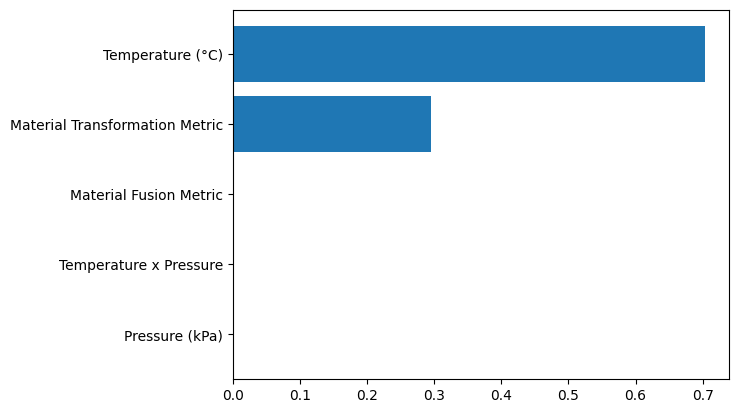

In [21]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)

# Step 6: Retrain and evaluate the model

In [22]:
x_train = x_train[['Temperature (°C)','Material Transformation Metric']]
x_test = x_test[['Temperature (°C)','Material Transformation Metric']]

In [23]:
model = XGBRegressor(colsample_bytree= 0.8, learning_rate = 0.2, max_depth = 5, n_estimators = 50, subsample = 0.8)
model.fit(x_train, y_train)
xgb_predict = model.predict(x_test)

In [24]:
r2_score(y_test, xgb_predict)

0.9998321155656614

In [25]:
mean_absolute_percentage_error(y_test, xgb_predict)

0.0011665684836571016

In [31]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = ['Temperature (°C)','Material Transformation Metric']
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)
importances.head(10)

,importance,feature
1,0.39184,Material Transformation Metric
0,0.60816,Temperature (°C)
